In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

In [2]:
# Read the csv 
df = pd.read_csv("/home/akeemlag/Downloads/titanic.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Explore the data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# names, passengerId, SibSp, Ticket, Cabin, Embarked, 
# Drop columns that do not add any trend to our dataset

df = df.drop(['Name', 'PassengerId', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)

df.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [11]:
# Drop null columns -> we should have fill the na but the percentage of missing to approx 20% which will cause a tilt in the deviation in our age dataset
df = df.dropna(axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Sex       714 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      714 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 27.9+ KB


In [12]:
# Create your target vector and feature matrix
X = df.drop('Survived', axis=1)
y = df.Survived

In [15]:
X

,Sex,Age,Fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500
...,...,...,...
885,female,39.0,29.1250
886,male,27.0,13.0000
887,female,19.0,30.0000
889,male,26.0,30.0000


In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [17]:
# Create a label encoder for sex
le_sex = LabelEncoder()

In [ ]:
X['sex_n'] = le_sex.fit_transform(X['Sex'])

In [20]:
X

,Sex,Age,Fare,sex_n
0,male,22.0,7.2500,1
1,female,38.0,71.2833,0
2,female,26.0,7.9250,0
3,female,35.0,53.1000,0
4,male,35.0,8.0500,1
...,...,...,...,...
885,female,39.0,29.1250,0
886,male,27.0,13.0000,1
887,female,19.0,30.0000,0
889,male,26.0,30.0000,1


In [21]:
X = X.drop('Sex', axis=1)

In [22]:
X

,Age,Fare,sex_n
0,22.0,7.2500,1
1,38.0,71.2833,0
2,26.0,7.9250,0
3,35.0,53.1000,0
4,35.0,8.0500,1
...,...,...,...
885,39.0,29.1250,0
886,27.0,13.0000,1
887,19.0,30.0000,0
889,26.0,30.0000,1


In [38]:
X, y = make_classification(random_state=42)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

In [40]:
X_test.shape

(20, 20)

In [55]:
model = make_pipeline(StandardScaler(with_mean=False), DecisionTreeClassifier(criterion='entropy'))

In [56]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [57]:
model.score(X_test, y_test)

0.9

In [44]:
model.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [45]:
y_test

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [47]:
# Build a confusion matrix

y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

In [48]:
cm

array([[11,  2],
       [ 0,  7]])

Text(0.5, 23.52222222222222, 'Truth')

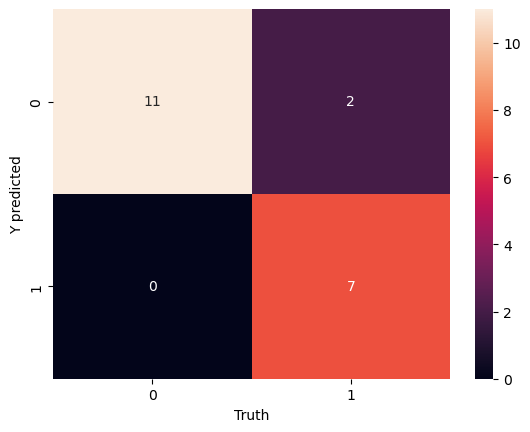

In [51]:
# Use seaborn to display the confusion matrix
sns.heatmap(cm, annot=True);
plt.ylabel('Y predicted')
plt.xlabel('Truth')